# Handling Unbalanced Data - Random Oversampling

What is Random Oversampling?

* Random oversampling is like making copies of our limited edition buyer records to make them seem more common.
* We're literally duplicating some of the records of customers who bought limited edition items.
* This helps our model learn that limited edition buyers are important and not just a rare occurrence.

How it Works:

Identify the Minority Class:

* We find the class with fewer samples (limited edition buyers).

Randomly Duplicate Samples:

* We randomly choose some records from the minority class.
* We make exact copies of those records.

Add Copies to the Dataset:

* We add the copies back into our dataset.

Repeat:

* We repeat this process until the number of samples in the minority class is closer to the number of samples in the majority class.

# 1. Import necessary dependencies

In [40]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# 2. Create sample Dataset

In [43]:
# Sample DataFrame with unbalanced data (simulating limited edition purchases)
data = pd.DataFrame({
    'CustomerID': range(100),
    'Regular_Purchase': [1] * 95 + [0] * 5,  # 1 for regular, 0 for limited edition
    'Purchase_Amount': np.random.randint(50, 200, 100)  # Random purchase amounts
})

print("Original Data :\n")
data

Original Data :



,CustomerID,Regular_Purchase,Purchase_Amount
0,0,1,194
1,1,1,172
2,2,1,107
3,3,1,111
4,4,1,91
...,...,...,...
95,95,0,127
96,96,0,71
97,97,0,121
98,98,0,178


In [44]:
print("Original Data (Unbalanced):\n")
data['Regular_Purchase'].value_counts()

Original Data (Unbalanced):



,count
Regular_Purchase,
1,95
0,5


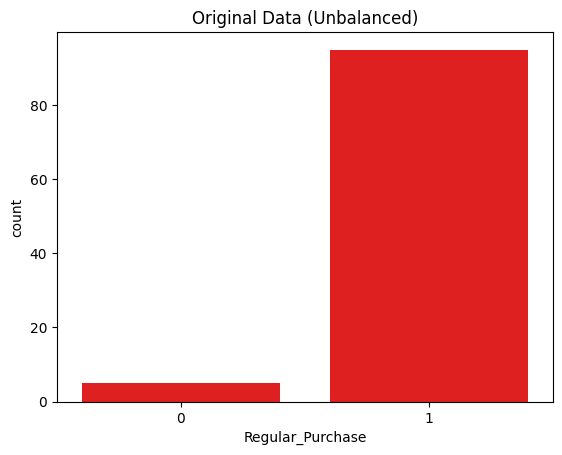

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Regular_Purchase', data=data , color='Red')
plt.title('Original Data (Unbalanced)')
plt.show()

# 3. Separate Majority and Minority Classes:

* We split the DataFrame into two DataFrames: data_majority (regular purchases) and data_minority (limited edition purchases).

In [45]:
# Separate majority and minority classes
data_majority = data[data.Regular_Purchase == 1]
data_minority = data[data.Regular_Purchase == 0]

In [47]:
data_majority['Regular_Purchase'].value_counts()

,count
Regular_Purchase,
1,95


In [48]:
data_minority['Regular_Purchase'].value_counts()

,count
Regular_Purchase,
0,5


# 4. Oversample Minority Class:

* We use resample() from scikit-learn to oversample the minority class.
* replace=True allows sampling with replacement (duplication).
* n_samples=len(data_majority) ensures that the oversampled minority class has the same number of samples as the majority class.
* random_state=42 sets a seed for reproducibility.

In [49]:
# Oversample minority class

data_minority_oversampled = resample(data_minority,
                                     replace=True,     # sample with replacement
                                     n_samples=len(data_majority),    # to match majority class
                                     random_state=42)  # reproducible results

In [51]:
data_minority_oversampled.shape

(95, 3)

# 5. Combine Classes:

* We concatenate the majority class DataFrame and the oversampled minority class DataFrame to create the balanced dataset.
* We print the value counts of the Regular_Purchase column before and after oversampling to show the effect.

In [52]:
# Combine majority class with oversampled minority class

data_oversampled = pd.concat([data_majority, data_minority_oversampled])

print("\nData after Random Oversampling:\n")
data_oversampled['Regular_Purchase'].value_counts()


Data after Random Oversampling:



,count
Regular_Purchase,
1,95
0,95


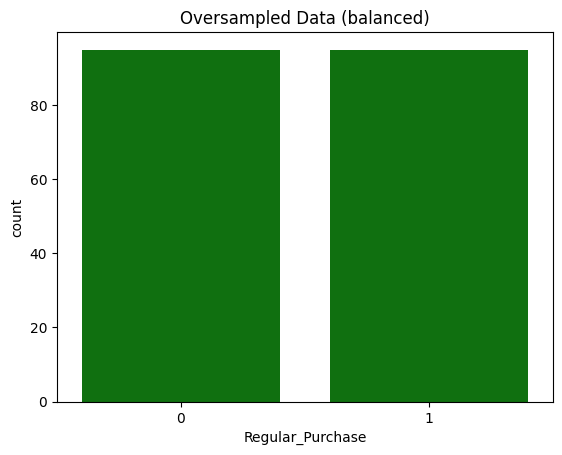

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Regular_Purchase', data=data_oversampled , color='Green')
plt.title('Oversampled Data (balanced)')
plt.show()

# ** Note

Key Points:

resample():

* This function from scikit-learn is used for resampling data.

Sampling with Replacement:

* Oversampling involves sampling with replacement, which means that the same sample can be selected multiple times.

Balancing the Data:

* The goal of oversampling is to balance the class distribution in the dataset.

Overfitting:

* Be aware of the risk of overfitting when using oversampling, as the model may learn the duplicated samples too well.

Random State:

* Setting a random_state ensures that the results are reproducible.

Model Evaluation:

* It's important to evaluate the model's performance on a separate test set to avoid bias.

Alternative Methods:

* Consider using other oversampling techniques like SMOTE for more complex datasets.

Data Splitting:

* It is crucial to split the data into training and test sets before oversampling. If you oversample before splitting, you risk data leakage and an overly optimistic evaluation of your model's performance.